This will be used to calculate return values using ridge regression. Below are 3 functions, which will predict 1 week, 1 month, and 1 year returns respectively. 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error

(2034, 4)
(2034,)
(360, 4)
(360,)
(4, 4)
r value
0.7358086125197966
rmse value
0.011869704710622833
(2597,)
(2034,)
(4,)


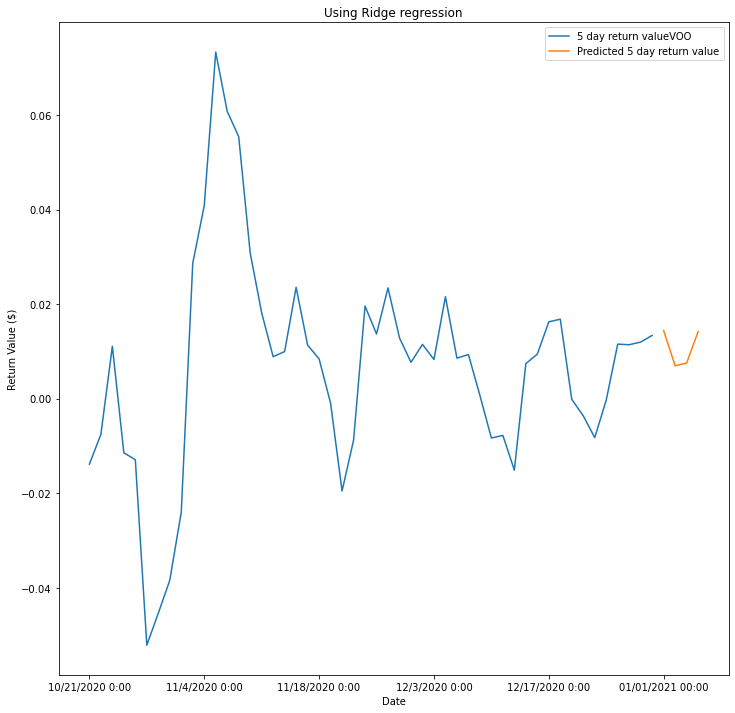

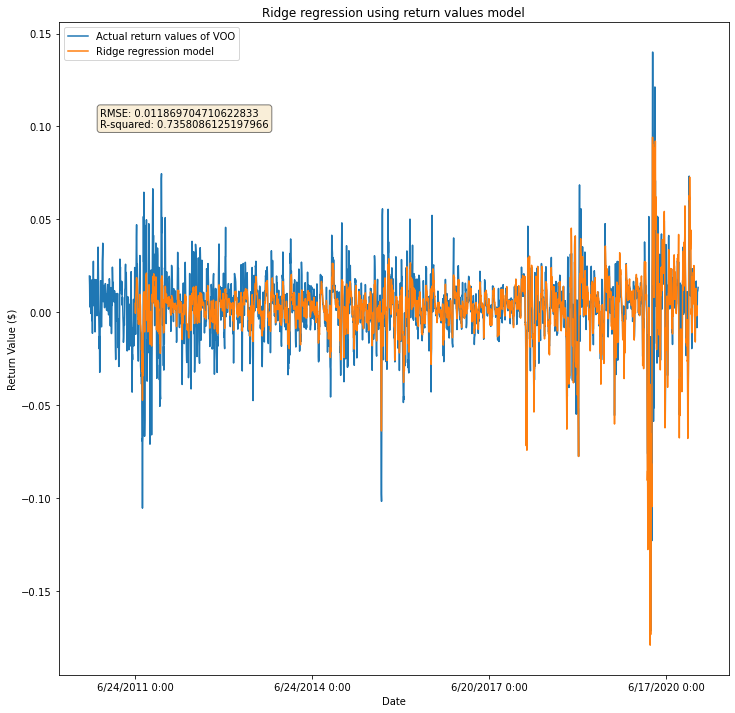

In [24]:
def ridge_regression_5day_ret(stock):
    df = pd.read_csv('moving_average_plus_returns.csv')
    dates = df['Date']
    stock_prices = df[stock]
    _10day_ma = df[stock + '_10day_MA']
    _50day_ma = df[stock+ '_50day_MA']
    _200day_ma = df[stock+ '_200day_MA']
    _5day_ret = df[stock+ '_5day_mvg_return']
    X = np.stack((stock_prices[199:],_10day_ma[199:], _50day_ma[199:], _200day_ma[199:]), axis=1)
    y = np.array(_5day_ret[199:])
    X_train, X_test, y_train, y_test = train_test_split(X[:X.shape[0]-4], y[:y.shape[0] - 4], test_size=0.15)
    X_pred = X[X.shape[0] - 4:]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    print(X_pred.shape)
    ridge_regression = Ridge()
    ridge_regression.fit(X_train, y_train)
    ridge_regression_score = ridge_regression.score(X_test, y_test)
    print("r value")
    print(ridge_regression_score)
    y_pred = ridge_regression.predict(X_pred)
    print("rmse value")
    y_hat = ridge_regression.predict(X_test)
    rmse = mean_squared_error(y_hat, y_test, squared=False)
    print(rmse)
    predicted_dates = [] #this is for calculating the predicted dates in the future
    for i in range(4):
        date = (datetime.strptime(df['Date'][2596], '%m/%d/%Y %H:%M') + timedelta(days=i + 1)).strftime('%m/%d/%Y %H:%M')
        predicted_dates.append(date)
    predicted_dates = np.asarray(predicted_dates)
    print(dates.shape)
    print(y_train.shape)
    print(y_pred.shape)
    ridge_model = ridge_regression.predict(X[:X.shape[0] - 4])
    
    fig, axes = plt.subplots(1,1)
    axes.plot(dates[-50:], y[-50:])
    axes.plot(predicted_dates, y_pred)
    axes.set_title("Using Ridge regression")
    axes.legend(["5 day return value" + stock, "Predicted 5 day return value"])
    axes.xaxis.set_label_text("Date")
    axes.yaxis.set_label_text("Return Value ($)")
    axes.set_xticks([0, 10, 20, 30, 40, 50]) #adjusts the number of ticks (dates displayed on x axis)
    fig.set_figheight(12)
    fig.set_figwidth(12)

    fig2, axes2 = plt.subplots(1,1)
    axes2.plot(dates, _5day_ret)
    axes2.plot(dates[199:dates.shape[0] - 4] , ridge_model)
    
    axes2.legend(["Actual return values of " + stock, "Ridge regression model"])
    axes2.set_title("Ridge regression using return values model")
    axes2.xaxis.set_label_text("Date")
    axes2.yaxis.set_label_text("Return Value ($)")
    axes2.set_xticks([200, 953, 1706, 2459])
    textstr = '\n'.join(("RMSE: {}".format(rmse), "R-squared: {}".format(ridge_regression_score)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes2.text(50, 0.11, textstr, bbox = props, verticalalignment = 'top') #may have to change the first two numbers in this line to fit the box in the graph
    fig2.set_figheight(12)
    fig2.set_figwidth(12)



ridge_regression_5day_ret('VOO')

(2022, 4)
(2022,)
(357, 4)
(357,)
(19, 4)
r value
0.6401936539617059
rmse value
0.024014061409726794
(2597,)
(2022,)
(19,)


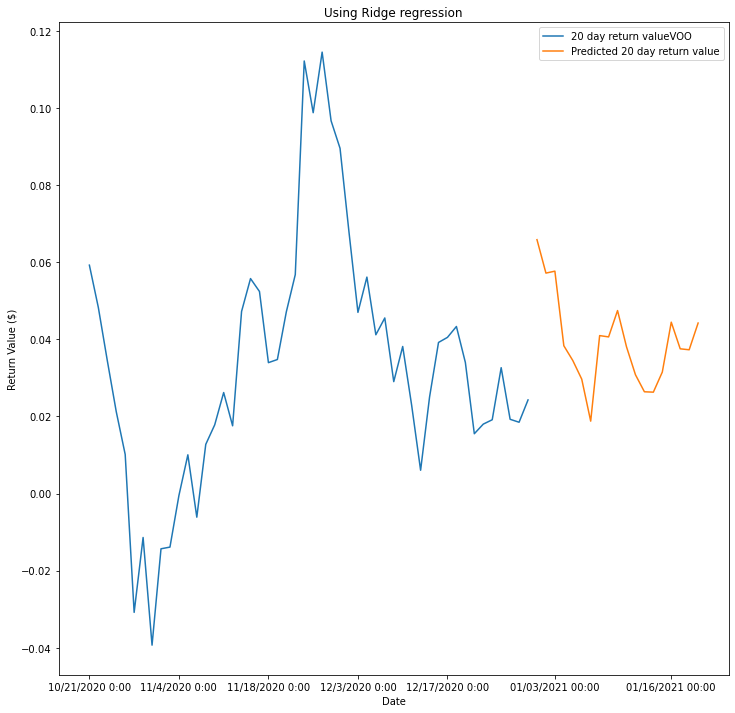

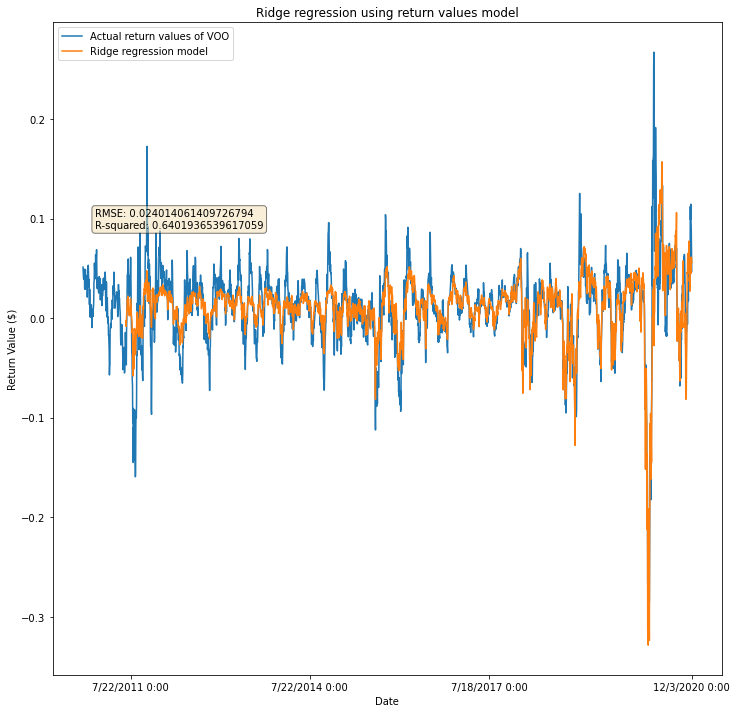

In [72]:
def ridge_regression_20day_ret(stock):
    df = pd.read_csv('moving_average_plus_returns.csv')
    dates = df['Date']
    stock_prices = df[stock]
    _10day_ma = df[stock + '_10day_MA']
    _50day_ma = df[stock+ '_50day_MA']
    _200day_ma = df[stock+ '_200day_MA']
    _20day_ret = df[stock+ '_20day_mvg_return']
    X = np.stack((stock_prices[199:],_10day_ma[199:], _50day_ma[199:], _200day_ma[199:]), axis=1)
    y = np.array(_20day_ret[199:])
    X_train, X_test, y_train, y_test = train_test_split(X[:X.shape[0]-19], y[:y.shape[0] - 19], test_size=0.15)
    X_pred = X[X.shape[0] - 19:]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    print(X_pred.shape)
    ridge_regression = Ridge()
    ridge_regression.fit(X_train, y_train)
    ridge_regression_score = ridge_regression.score(X_test, y_test)
    print("r value")
    print(ridge_regression_score)
    y_pred = ridge_regression.predict(X_pred)
    print("rmse value")
    y_hat = ridge_regression.predict(X_test)
    rmse = mean_squared_error(y_hat, y_test, squared=False)
    print(rmse)
    predicted_dates = [] #this is for calculating the predicted dates in the future
    for i in range(19):
        date = (datetime.strptime(df['Date'][2596], '%m/%d/%Y %H:%M') + timedelta(days=i + 1)).strftime('%m/%d/%Y %H:%M')
        predicted_dates.append(date)
    predicted_dates = np.asarray(predicted_dates)
    print(dates.shape)
    print(y_train.shape)
    print(y_pred.shape)
    ridge_model = ridge_regression.predict(X[:X.shape[0] - 19])
    
    fig, axes = plt.subplots(1,1)
    axes.plot(dates[-50:], y[-50:])
    axes.plot(predicted_dates, y_pred)
    axes.set_title("Using Ridge regression")
    axes.legend(["20 day return value" + stock, "Predicted 20 day return value"])
    axes.xaxis.set_label_text("Date")
    axes.yaxis.set_label_text("Return Value ($)")
    axes.set_xticks([0, 10, 20, 30, 40, 52, 65]) #adjusts the number of ticks (dates displayed on x axis)
    fig.set_figheight(12)
    fig.set_figwidth(12)

    fig2, axes2 = plt.subplots(1,1)
    axes2.plot(dates[19:-19], _20day_ret[19:-19])
    axes2.plot(dates[199:dates.shape[0] - 19] , ridge_model)
    axes2.legend(["Actual return values of " + stock, "Ridge regression model"])
    axes2.set_title("Ridge regression using return values model")
    axes2.xaxis.set_label_text("Date")
    axes2.yaxis.set_label_text("Return Value ($)")
    axes2.set_xticks([200, 953, 1706, 2558])
    textstr = '\n'.join(("RMSE: {}".format(rmse), "R-squared: {}".format(ridge_regression_score)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes2.text(50, 0.11, textstr, bbox = props, verticalalignment = 'top') #may have to change the first two numbers in this line to fit the box in the graph
    fig2.set_figheight(12)
    fig2.set_figwidth(12)



ridge_regression_20day_ret('VOO')

(1767, 4)
(1767,)
(312, 4)
(312,)
(259, 4)
r value
0.535054878105166
rmse value
0.05814841500545309
(2597,)
(1767,)
(259,)


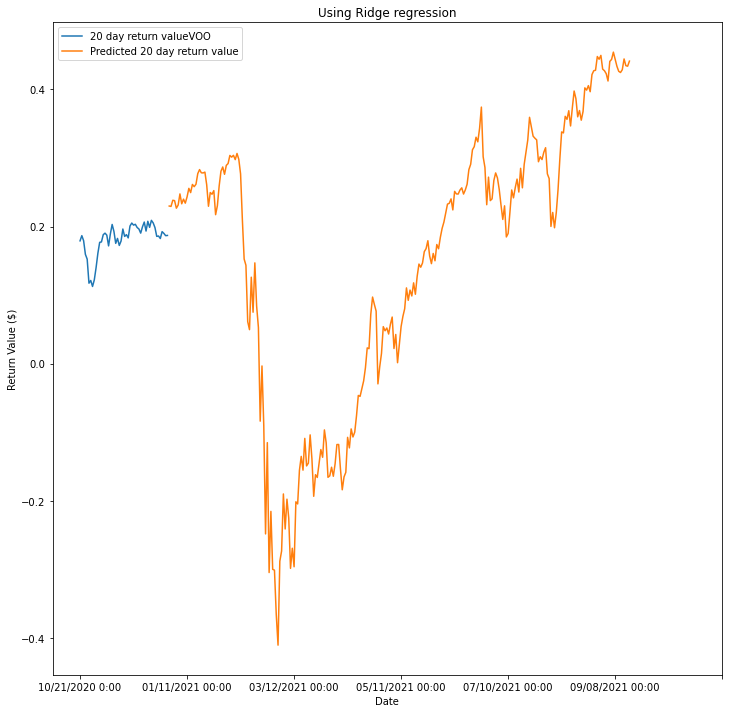

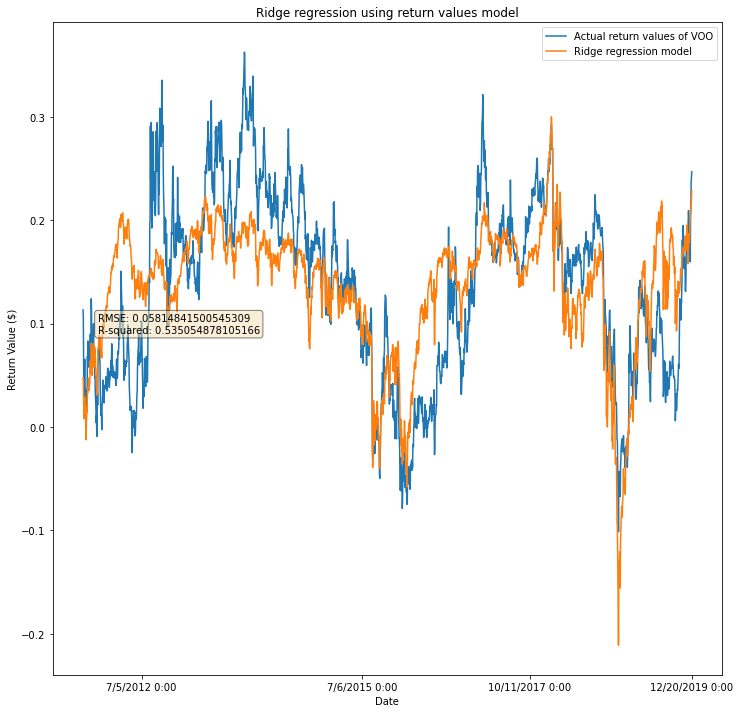

In [65]:
def ridge_regression_260day_ret(stock):
    df = pd.read_csv('moving_average_plus_returns.csv')
    dates = df['Date']
    stock_prices = df[stock]
    _10day_ma = df[stock + '_10day_MA']
    _50day_ma = df[stock+ '_50day_MA']
    _200day_ma = df[stock+ '_200day_MA']
    _260day_ret = df[stock+ '_260day_mvg_return']
    X = np.stack((stock_prices[259:],_10day_ma[259:], _50day_ma[259:], _200day_ma[259:]), axis=1)
    y = np.array(_260day_ret[259:])
    X_train, X_test, y_train, y_test = train_test_split(X[:X.shape[0]-259], y[:y.shape[0] - 259], test_size=0.15)
    X_pred = X[X.shape[0] - 259:]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    print(X_pred.shape)
    ridge_regression = Ridge()
    ridge_regression.fit(X_train, y_train)
    ridge_regression_score = ridge_regression.score(X_test, y_test)
    print("r value")
    print(ridge_regression_score)
    y_pred = ridge_regression.predict(X_pred)
    print("rmse value")
    y_hat = ridge_regression.predict(X_test)
    rmse = mean_squared_error(y_hat, y_test, squared=False)
    print(rmse)
    predicted_dates = [] #this is for calculating the predicted dates in the future
    for i in range(259):
        date = (datetime.strptime(df['Date'][2596], '%m/%d/%Y %H:%M') + timedelta(days=i + 1)).strftime('%m/%d/%Y %H:%M')
        predicted_dates.append(date)
    predicted_dates = np.asarray(predicted_dates)
    print(dates.shape)
    print(y_train.shape)
    print(y_pred.shape)
    ridge_model = ridge_regression.predict(X[:X.shape[0] - 259])
    
    fig, axes = plt.subplots(1,1)
    axes.plot(dates[-50:], y[-50:])
    axes.plot(predicted_dates, y_pred)
    axes.set_title("Using Ridge regression")
    axes.legend(["20 day return value" + stock, "Predicted 20 day return value"])
    axes.xaxis.set_label_text("Date")
    axes.yaxis.set_label_text("Return Value ($)")
    axes.set_xticks([0, 60, 120, 180, 240, 300, 360]) #adjusts the number of ticks (dates displayed on x axis)
    fig.set_figheight(12)
    fig.set_figwidth(12)
    fig2, axes2 = plt.subplots(1,1)
    axes2.plot(dates[259:-259], _260day_ret[259:-259])
    axes2.plot(dates[259:dates.shape[0] - 259] , ridge_model)
    
    axes2.legend(["Actual return values of " + stock, "Ridge regression model"])
    axes2.set_title("Ridge regression using return values model")
    axes2.xaxis.set_label_text("Date")
    axes2.yaxis.set_label_text("Return Value ($)")
    axes2.set_xticks([200, 953, 1526, 2078])
    textstr = '\n'.join(("RMSE: {}".format(rmse), "R-squared: {}".format(ridge_regression_score)))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes2.text(50, 0.11, textstr, bbox = props, verticalalignment = 'top') #may have to change the first two numbers in this line to fit the box in the graph
    fig2.set_figheight(12)
    fig2.set_figwidth(12)



ridge_regression_260day_ret('VOO')